# Too Many or Too Few
### Sampling Bounds for Topological Descriptors

#### Authors

#### Link to paper

This [Jupyter](https://jupyter.org/) notebook is an electronic supplementry material of the paper.

## Global package Dependencies

This has been included seperately so that individual experiments may be run independently.

In [1]:
from IPython.display import clear_output, Image
import numpy as np
import time
import rpy2.rinterface
import random
%load_ext rpy2.ipython

## Preprocessing
#### The following code will download the MPEG7/EMNIST data and create and store the data in the appropriate folders. 
You can find the MPEG7 data at: http://www.dabi.temple.edu/~shape/MPEG7
    
You can find the EMNIST data at: https://www.nist.gov/itl/products-and-services/emnist-dataset

Note: All steps in this subsection must run before any of the experiments may run.

#### Create folders and download data.

In [2]:
from utils.get_data import preprocess_data, dir_list


preprocess_data(dir_list)

#Clear output when done running code
clear_output()

#### Create the graphs for random point clouds

In [3]:
from utils.build_graphs import randpts_graphs
import random


# make sure we have the same seeds as main experiments
random.seed(423652346)
np.random.seed(423652346)

randpts_graphs()

#Clear output when done creating graphs
clear_output()

<Figure size 640x480 with 0 Axes>

#### Create the graphs for MPEG7 data

In [4]:
from utils.build_graphs import mpeg7_graphs

#Change eps according to how close we want the approx
eps = .001
#Change to corresponding eps 
graphs_dir = "graphs_001_approx" 
mpeg7_graphs(eps, graphs_dir)



eps = .005
graphs_dir = "graphs_005_approx" 
mpeg7_graphs(eps, graphs_dir)


#Clear output when done creating graphs
clear_output()

<Figure size 640x480 with 0 Axes>

#### Create the graphs for EMNIST data

In [5]:
from utils.build_graphs import mnist_graphs

#Change eps according to how close we want the approx
eps = .001

#Change to corresponding eps 
graphs_dir = "graphs_001_approx" 

mnist_graphs(eps, graphs_dir)

#Change eps according to how close we want the approx
eps = .005
#Change to corresponding eps 
graphs_dir = "graphs_005_approx" 

mnist_graphs(eps, graphs_dir)

#Clear output when done creating graphs
clear_output()

<Figure size 640x480 with 0 Axes>

## Experiments

### Section 4.2 - Smallest Stratum Experiment

This section begins by implementing the experiment for section 4.2 with an epsilon value for our image discritization of 0.001. This has the same behavior as running:

On the command line.

In [6]:
from exp_handler import get_exp_graphs, exp
print("Complete")
  



Experiment Progress: 100%|█████████████████| 8120/8120 [00:52<00:00, 156.15it/s]

Complete


In [7]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "001"
rando("smallest_angle_exp",approx,"angle_stats")
mpeg7_mnist("mpeg7","smallest_angle_exp", approx, "angle_stats")
mpeg7_mnist("mnist","smallest_angle_exp", approx, "angle_stats")

In [8]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/smallest_angle_exp/*/
# Creates both pdf and png files

source("utils/analysis.R")
approx <- "001"
random <- get_exp_files(approx,"smallest_angle_exp", "random")
mnist <- get_exp_files(approx,"smallest_angle_exp", "mnist")
mpeg7 <- get_exp_files(approx,"smallest_angle_exp", "mpeg7")

perform_smallest_angle_analysis(random,mnist,mpeg7,approx)


[1] "Length"
[1] 1200
[1] "MSE"
[1] "Length"
[1] 5623
[1] "MSE"
[1] "Length"
[1] 1396
[1] "MSE"
[1] "Length"
[1] 1200
[1] "MSE"
[1] "Length"
[1] 5623
[1] "MSE"
[1] "Length"
[1] 1396
[1] "MSE"
[1] "Best Fit Summary RANDPTS"

Call:
lm(formula = log(in_file$minSize) ~ log(in_file$n))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5698 -0.5958  0.1830  0.8530  2.6137 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.17515    0.11291   28.12   <2e-16 ***
log(in_file$n) -4.28122    0.03151 -135.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.222 on 1198 degrees of freedom
Multiple R-squared:  0.939,	Adjusted R-squared:  0.939 
F-statistic: 1.845e+04 on 1 and 1198 DF,  p-value: < 2.2e-16

[1] "Best Fit Summary MNIST"

Call:
lm(formula = log(in_file$minSize) ~ log(in_file$n))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4491 -0.6887  0.2400  0.9337  2.9624 

Coefficients:


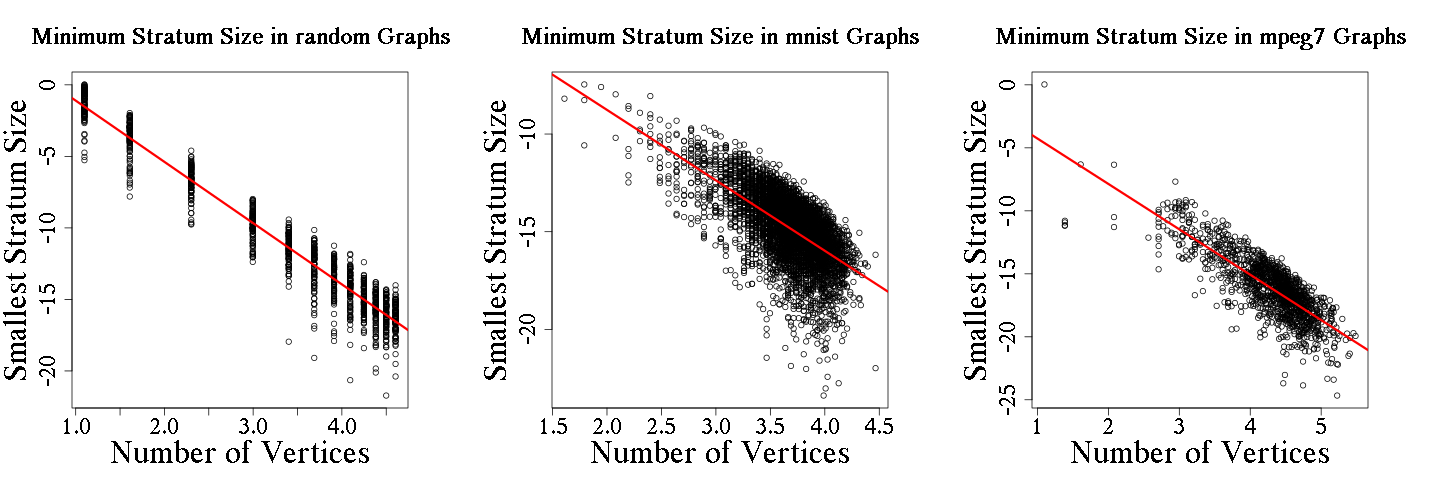

In [9]:
from utils.combine_data import combine_pngs

approx = '001'
combine_pngs('smallest_angle_exp', approx)
Image("figs/smallest_angle_exp/smallest_angle_exp_001.png")

We continue with the experiment for section 4.2 with an epsilon value for our image discritization of 0.005. This has the same behavior as running:

On the command line.

In [10]:
from exp_handler import get_exp_graphs, exp

# modify for that approximation type for emnist and mpeg7
# when running exp_handler as a script theseare set using a command line argument
# choices include graphs_001_approx and graphs_005_approx
# command line argument relies only on an epsilon value
graphs_dir = "graphs_005_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_005_approx"

# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 for smallest angle experiment (smallest_angle_exp)
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 1

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  
print("Complete")



Experiment Progress: 100%|█████████████████| 8307/8307 [00:20<00:00, 406.70it/s]

Complete


In [11]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "005"
rando("smallest_angle_exp",approx,"angle_stats")
mpeg7_mnist("mpeg7","smallest_angle_exp", approx, "angle_stats")
mpeg7_mnist("mnist","smallest_angle_exp", approx, "angle_stats")

In [12]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/smallest_angle_exp/*/
# Graphs show:
#   x-axis: number of vertices
#   y-axis: the ratio number of generated stratum using smallest size/number of
#		stratum
# Creates both pdf and png files

#source("plotting-code/analysis_001_approx-smallest_angle_exp-smallest_angle_graphs.R")
#smallest_angle_exp_stat_001()

#data <- get_smallest_angle_exp_files("001","smallest_angle_exp", "angle_stats")
#perform_analysis(data)
source("utils/analysis.R")
approx <- "005"
random <- get_exp_files(approx,"smallest_angle_exp", "random")
mnist <- get_exp_files(approx,"smallest_angle_exp", "mnist")
mpeg7 <- get_exp_files(approx,"smallest_angle_exp", "mpeg7")

perform_smallest_angle_analysis(random,mnist,mpeg7,approx)


[1] "Length"
[1] 1200
[1] "MSE"
[1] "Length"
[1] 5751
[1] "MSE"
[1] "Length"
[1] 1356
[1] "MSE"
[1] "Length"
[1] 1200
[1] "MSE"
[1] "Length"
[1] 5751
[1] "MSE"
[1] "Length"
[1] 1356
[1] "MSE"
[1] "Best Fit Summary RANDPTS"

Call:
lm(formula = log(in_file$minSize) ~ log(in_file$n))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5698 -0.5958  0.1830  0.8530  2.6137 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.17515    0.11291   28.12   <2e-16 ***
log(in_file$n) -4.28122    0.03151 -135.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.222 on 1198 degrees of freedom
Multiple R-squared:  0.939,	Adjusted R-squared:  0.939 
F-statistic: 1.845e+04 on 1 and 1198 DF,  p-value: < 2.2e-16

[1] "Best Fit Summary MNIST"

Call:
lm(formula = log(in_file$minSize) ~ log(in_file$n))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9781 -0.7059  0.2092  0.9356  2.7530 

Coefficients:


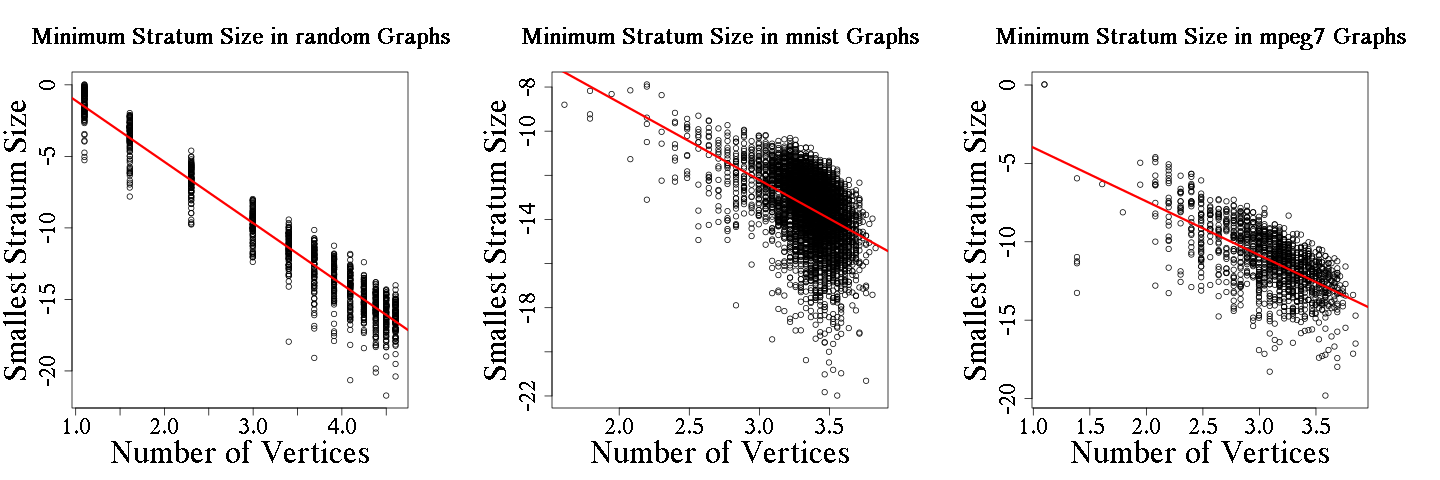

In [13]:
from utils.combine_data import combine_pngs
approx = '005'
combine_pngs('smallest_angle_exp', approx)
Image("figs/smallest_angle_exp/smallest_angle_exp_005.png")

## Section 4.3 - Constant Size Discretization

In [ ]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random

# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 2

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  
print("Complete")


#Clear output when done running experiment
clear_output()

Experiment Progress:   8%|█▏            | 656/8120 [1:54:03<36:13:30, 17.47s/it]

In [ ]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "001"
rando("uniform_sample_exp",approx,"sample_stats")
mpeg7_mnist("mpeg7","uniform_sample_exp", approx, "sample_stats")
mpeg7_mnist("mnist","uniform_sample_exp", approx, "sample_stats")

In [ ]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/uniform_sample_exp/*/
# Creates both pdf and png files

source("utils/analysis.R")
approx <- "001"
random <- get_exp_files(approx,"uniform_sample_exp", "random")
mnist <- get_exp_files(approx,"uniform_sample_exp", "mnist")
mpeg7 <- get_exp_files(approx,"uniform_sample_exp", "mpeg7")

perform_uniform_sample_analysis(random,mnist,mpeg7, approx)

In [ ]:
from utils.combine_data import combine_pngs
approx = "001"
combine_pngs('uniform_sample_exp', approx)
Image("figs/uniform_sample_exp/uniform_sample_exp_001.png")

In [ ]:
from exp_handler import get_exp_graphs, exp
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_005_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_005_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for a uniform random sample experiment (uniform_sample_exp)
#       5 for all four exps
exp_type = 2

#### data is:
#       1 for random
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three
#       5 for test
data_type = 4

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments
for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)
  
print("Complete")

#Clear output when done running experiment
clear_output()

In [ ]:
from utils.combine_data import rando, mpeg7_mnist

#Combines experiment files for statistical analysis
approx = "005"
rando("uniform_sample_exp",approx,"sample_stats")
mpeg7_mnist("mpeg7","uniform_sample_exp", approx, "sample_stats")
mpeg7_mnist("mnist","uniform_sample_exp", approx, "sample_stats")

In [ ]:
%%R
# Reads data from output/combined_data/*/
# Generates graphs in figs/uniform_sample_exp/*/
# Creates both pdf and png files

source("utils/analysis.R")

approx <- "005"
random <- get_exp_files(approx,"uniform_sample_exp", "random")
mnist <- get_exp_files(approx,"uniform_sample_exp", "mnist")
mpeg7 <- get_exp_files(approx,"uniform_sample_exp", "mpeg7")

perform_uniform_sample_analysis(random,mnist,mpeg7, approx)

In [ ]:
from utils.combine_data import combine_pngs
approx = "005"
combine_pngs('uniform_sample_exp', approx)
Image("figs/uniform_sample_exp/uniform_sample_exp_005.png")

## Delta Experiment

In [ ]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for the delta experiment (delta_exp)
#       5 for all four exps
exp_type = 4

#### data is:
#       1 for random (NOT VALID FOR DELTA EXPERIMENT)
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three (NOT VALID FOR DELTA EXPERIMENT)
#       5 for test
data_type = 2

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments

for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")

In [ ]:
from exp_handler import get_exp_graphs, exp
from tqdm import tqdm
import random
# modify for that approximation type for emnist and mpeg7
# choices include graphs_001_approx and graphs_005_approx
graphs_dir = "graphs_001_approx"
# same as above but specifies where to write results
out_graphs_dir = "output_001_approx"

# main function for setting up and executing experiments
start = time.time()
# Set for random experiments only
random.seed(423652346)
np.random.seed(423652346)

#### exp type is:
#       1 for smallest stratum experiment (smallest_stratum_exp)
#       2 for a uniform random sample experiment (uniform_sample_exp)
#       3 ******************************************
#       4 for the delta experiment (delta_exp)
#       5 for all four exps
exp_type = 4

#### data is:
#       1 for random (NOT VALID FOR DELTA EXPERIMENT)
#       2 for MPEG7 (classes from PHT paper - Turner et al.)
#       3 for EMNIST
#       4 for all three (NOT VALID FOR DELTA EXPERIMENT)
#       5 for test
data_type = 3

exp_list = get_exp_graphs(data_type,graphs_dir,out_graphs_dir)

# Run the experiments

for e in tqdm(exp_list, desc="Experiment Progress"):
    exp(e["G"], e["output_file"], exp_type, out_graphs_dir)

print("Complete")

In [ ]:
%%R

# Reads data from output/distribution_exp/*/
# Generates graphs in figs/distribution_exp/*/
# Graphs show:
#		x-axis: number of stratum
#		y-axis: average stratum size


mnist_file <- read.table(("output_001_approx/delta_exp/mnist/deltas.txt"), header=TRUE, sep=",")

mpeg7_file <- read.table(("output_001_approx/delta_exp/mpeg7/deltas.txt"), header=TRUE, sep=",")



pdf("figs/delta_exp_figs/mnist/mnist_delta_exp_001.pdf")
par(mar=c(5, 5, 5, 5))
hist(mnist_file$delta,ylab="Number of Graphs",xlab="size (radians)",main="",family="serif",cex.lab=3, cex.main=2,cex.sub=2,cex.axis=2)
print("Min delta for MNIST")
print(min(mnist_file$delta))
print("Max delta for MNIST")
print(max(mnist_file$delta))
print("Total number of graphs")
print(length(mnist_file$n))
print(summary(mnist_file$delta))
dev.off()

pdf("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_001.pdf")
par(mar=c(5, 5, 5, 5))
hist(mpeg7_file$delta,ylab="Number of Graphs",xlab="size (radians)",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
print("Min delta for MPEG7")
print(min(mpeg7_file$delta))
print("Max delta for MPEG7")
print(max(mpeg7_file$delta))
print("Total number of graphs")
print(length(mpeg7_file$n))
print(summary(mpeg7_file$delta))
dev.off()

pdf("figs/delta_exp_figs/mnist/mnist_delta_exp_plot_001.pdf")
par(mar=c(5, 5, 5, 5))
plot(mnist_file$n, mnist_file$delta, ylab="Delta (radians)",xlab="Vertices",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
dev.off()

pdf("figs/delta_exp_figs/mpeg7/mpeg7_delta_exp_plot_001.pdf")
par(mar=c(5, 5, 5, 5))
plot(mpeg7_file$n, mpeg7_file$delta, ylab="Delta (radians)",xlab="Vertices",
	main="",
	family="serif",cex.lab=3, cex.main=2,
  cex.sub=2,cex.axis=2)
dev.off()